In [1]:
import json
import urllib, urllib2, base64
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dateutil import parser

SENSEI_SERVER = 'http://localhost:5000/'
SENSEI_API = SENSEI_SERVER + 'api/v1/'
SENSEI_USER = 'super@example.com'
SENSEI_PASSWORD = 'password'
CLASSROOM_ID = 1
CHILD_ID = 1

def api_req(endpoint, params=None):
    url = SENSEI_API + endpoint
    if params:
        url += '?' + urllib.urlencode(params)
    req = urllib2.Request(url)
    base64string = base64.b64encode('%s:%s' % (SENSEI_USER, SENSEI_PASSWORD))
    req.add_header("Authorization", "Basic %s" % base64string)
    req.add_header('Content-Type', 'application/json')
    return req

params = {
    'classroom_id': CLASSROOM_ID,
    'child_id':     CHILD_ID,
    'start_time':   '2017-1-10T00:00:00',
    'end_time':     '2017-1-20T00:00:00'
}
req = api_req('radio_observations', params)
response = urllib2.urlopen(req)
data = json.loads(response.read())
print data.keys()

[u'entities', u'obs', u'timestamps']


In [2]:
data3d = np.transpose(np.array(data['obs']))
print data3d[0,:,:].shape

(1033, 17)


In [3]:
data3d[0,:,0]
time_idx = [parser.parse(x) for x in data['timestamps']]
columns = ["%s_%d" % (x[0], x[1]) for x in data['entities']]
df = pd.DataFrame(data3d[0,:,:], index=time_idx, columns=columns)
df.head()

,child_2,child_3,child_4,child_5,child_6,child_7,material_1,material_2,material_3,material_4,material_5,material_6,material_7,material_8,material_9,material_10,teacher_3
2017-01-10 08:00:00.011109,-85.43,-84.71,0.00,-97.75,-85.85,0.00,-109.43,-95.39,-81.77,-80.68,-88.97,-79.91,-97.57,-83.39,0.00,0.00,-92.53
2017-01-10 08:00:10.011109,0.00,-74.50,-94.28,-88.79,-78.64,-91.97,-86.31,-95.57,0.00,0.00,-82.57,-85.74,0.00,-87.04,-96.12,-96.38,-103.26
2017-01-10 08:00:20.011109,-85.30,-76.46,0.00,-100.64,-77.06,-89.86,-90.93,-82.22,0.00,-90.38,-95.52,0.00,-81.07,0.00,0.00,-89.52,-100.01
2017-01-10 08:00:30.011109,-83.56,-82.18,-96.94,-102.70,-90.13,0.00,0.00,-86.49,-85.40,-87.55,-83.27,-82.17,0.00,0.00,0.00,0.00,-88.36
2017-01-10 08:00:40.011109,-82.71,-77.83,0.00,-101.85,-93.20,-99.96,0.00,-87.06,0.00,-98.86,-83.05,-92.96,-87.35,-88.62,0.00,-93.31,0.00


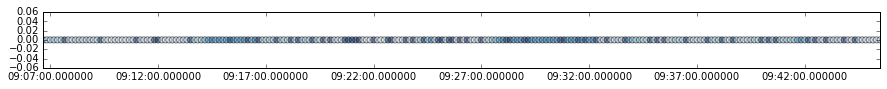

In [53]:
ar = df['child_2']

fig, ax = plt.subplots(figsize=(15, 1))
ax.set_xlim([time_idx[400], time_idx[-400]])

ax.scatter(time_idx, len(ar) * [0], c=ar.values, alpha=0.5, marker='.', cmap='Blues', s=[150]*len(ar))

In [38]:
len(time_idx)

1033